# **9. PIPELINE**

In [1]:
!git clone https://github.com/camillasancricca/DATADIQ.git

Cloning into 'DATADIQ'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 235 (delta 43), reused 1 (delta 1), pack-reused 139 (from 1)
Receiving objects: 100% (235/235), 11.34 MiB | 3.52 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (35/35), done.


In [2]:
!pip install ydata-profiling efficient-apriori

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=95b8e3c625e5a1b89febc8ce1b8d301d70993a6d01123e5d9fdeee20c188862f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import efficient_apriori
%matplotlib inline

def rules(store_data, support, confidence):

    #every tuple is a record, the index of the column is also stored
    records = []
    for i in range(0, len(store_data)):
        records.append([(str(store_data.values[i,j]), j) for j in range(0, len(store_data.columns))])

    #find the rules using apriori algorithm
    itemset, rules = efficient_apriori.apriori(records, min_support=support, min_confidence=confidence)
    print(rules)
    return rules

def ZS(data, threshold):
    mean = np.mean(data)
    sd = np.std(data) # calculate standard deviation
    outliers = [] # create empty list to store outliers
    for i in data: # detect outliers
        z = (i - mean) / sd  # calculate z-score
        if abs(z) > threshold:  # identify outliers
            outliers.append(i)  # add to the empty list

    # print outliers
    print("The detected outliers are: ", str(outliers))


**1) DATA EXPLORATION & PROFILING**

In [103]:
DATA = pd.read_csv("https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/RENTAL.csv")
DATA

,Floor,Kitchen_type,Bedrooms,Bathrooms,Primary_energy_consumption,Energy_class,CO_emission,Heating_type,Tenement_building,space,listing_type,Number_of_frontages,Address,Construction_year,Terrace,price
0,2.0,USA installed,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,NaN,Apartment for rent,NaN,NaN,NaN,NaN,€750 (+ €30)\n750€ + 30€ per month
1,3.0,Installed,2.0,1.0,Not specified,Not specified,Not specified,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,Rue Des Carmélites 88\n1180 - Uccle,NaN,NaN,"€1,150 (+ €200)\n1150€ + 200€ per month"
2,3.0,USA hyper equipped,2.0,1.0,242 kWh/m²\nkilowatt hour per square meters,E,52 kg CO₂/m²,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,NaN,1970.0,NaN,"€1,200 (+ €80)\n1200€ + 80€ per month"
3,3.0,Installed,2.0,1.0,542 kWh/m²\nkilowatt hour per square meters,G,109 kg CO₂/m²,Gas,No,75 m²\nsquare meters,Apartment for rent,2.0,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,NaN,NaN,"€1,050 (+ €50)\n1050€ + 50€ per month"
4,4.0,Hyper equipped,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,70 m²\nsquare meters,Apartment for rent,NaN,NaN,NaN,NaN,€960 (+ €80)\n960€ + 80€ per month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,260 kWh/m²\nkilowatt hour per square meters,E,Not specified,NaN,No,100 m²\nsquare meters,Duplex for rent,NaN,Avenue de l'université 38/40\n1050 - Ixelles,NaN,NaN,"€1,330 (+ €30)\n1330€ + 30€ per month"
998,2.0,Hyper equipped,3.0,1.0,136 kWh/m²\nkilowatt hour per square meters,C,27 kg CO₂/m²,Gas,No,124 m²\nsquare meters,Apartment for rent,2.0,"Val des Seigneurs, 9a\n1150 - Woluwe-St-Pierre",1991.0,NaN,"€1,450/month\n1450€ per month"
999,3.0,USA hyper equipped,2.0,2.0,Not specified,Not specified,Not specified,Gas,No,80 m²\nsquare meters,Penthouse for rent,2.0,Rue Louis van Beethoven 25\n1070 - Anderlecht,2022.0,NaN,"€1,250 (+ €80)\n1250€ + 80€ per month"
1000,2.0,USA hyper equipped,2.0,2.0,Not specified,Not specified,Not specified,Gas,No,125 m²\nsquare meters,Apartment for rent,2.0,Avenue Louise 523\n1050 - Ixelles,NaN,NaN,"€1,850 (+ €300)\n1850€ + 300€ per month"


In [5]:
DATA.columns

Index(['Floor', 'Kitchen_type', 'Bedrooms', 'Bathrooms',
       'Primary_energy_consumption', 'Energy_class', 'CO_emission',
       'Heating_type', 'Tenement_building', 'space', 'listing_type',
       'Number_of_frontages', 'Address', 'Construction_year', 'Terrace',
       'price'],
      dtype='object')

In [6]:
DATA.head()

,Floor,Kitchen_type,Bedrooms,Bathrooms,Primary_energy_consumption,Energy_class,CO_emission,Heating_type,Tenement_building,space,listing_type,Number_of_frontages,Address,Construction_year,Terrace,price
0,2.0,USA installed,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,NaN,Apartment for rent,NaN,NaN,NaN,NaN,€750 (+ €30)\n750€ + 30€ per month
1,3.0,Installed,2.0,1.0,Not specified,Not specified,Not specified,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,Rue Des Carmélites 88\n1180 - Uccle,NaN,NaN,"€1,150 (+ €200)\n1150€ + 200€ per month"
2,3.0,USA hyper equipped,2.0,1.0,242 kWh/m²\nkilowatt hour per square meters,E,52 kg CO₂/m²,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,NaN,1970.0,NaN,"€1,200 (+ €80)\n1200€ + 80€ per month"
3,3.0,Installed,2.0,1.0,542 kWh/m²\nkilowatt hour per square meters,G,109 kg CO₂/m²,Gas,No,75 m²\nsquare meters,Apartment for rent,2.0,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,NaN,NaN,"€1,050 (+ €50)\n1050€ + 50€ per month"
4,4.0,Hyper equipped,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,70 m²\nsquare meters,Apartment for rent,NaN,NaN,NaN,NaN,€960 (+ €80)\n960€ + 80€ per month


In [7]:
DATA.shape


(1002, 16)

In [8]:
DATA.describe()


,Floor,Bedrooms,Bathrooms,Number_of_frontages,Construction_year
count,779.000000,931.000000,804.000000,716.000000,438.000000
mean,3.256739,1.952739,1.300995,2.224860,6681.988584
std,2.557979,0.970490,0.610370,0.615417,30874.401032
min,1.000000,1.000000,1.000000,1.000000,1800.000000
25%,2.000000,1.000000,1.000000,2.000000,1950.000000
50%,3.000000,2.000000,1.000000,2.000000,1980.000000
75%,4.000000,2.000000,1.000000,2.000000,2015.750000
max,24.000000,7.000000,7.000000,4.000000,232323.000000


In [9]:
DATA.dtypes


,0
Floor,float64
Kitchen_type,object
Bedrooms,float64
Bathrooms,float64
Primary_energy_consumption,object
Energy_class,object
CO_emission,object
Heating_type,object
Tenement_building,object
space,object


In [10]:
DATA.duplicated().any()


True

In [11]:
DUPLICATES = DATA[DATA.duplicated()]
DUPLICATES

,Floor,Kitchen_type,Bedrooms,Bathrooms,Primary_energy_consumption,Energy_class,CO_emission,Heating_type,Tenement_building,space,listing_type,Number_of_frontages,Address,Construction_year,Terrace,price
142,2.0,Hyper equipped,3.0,2.0,163 kWh/m²\nkilowatt hour per square meters,D,32 kg CO₂/m²,NaN,No,110 m²\nsquare meters,Apartment for rent,2.0,Boulevard Général Jacques\n1050 - Ixelles,2004.0,NaN,"€1,500 (+ €150)\n1500€ + 150€ per month"
339,6.0,Installed,1.0,1.0,366 kWh/m²\nkilowatt hour per square meters,G,73 kg CO₂/m²,Gas,No,70 m²\nsquare meters,Penthouse for rent,4.0,Blvd. G. Wahis 272 (place Meiser)\n1030 - Scha...,1976.0,NaN,€990 (+ €185)\n990€ + 185€ per month
341,6.0,Installed,1.0,1.0,366 kWh/m²\nkilowatt hour per square meters,G,73 kg CO₂/m²,Gas,No,70 m²\nsquare meters,Apartment for rent,4.0,Blvd. G. Wahis 272 (place Meiser)\n1030 - Scha...,1976.0,NaN,€990 (+ €185)\n990€ + 185€ per month
347,4.0,Semi equipped,2.0,1.0,357 kWh/m²\nkilowatt hour per square meters,G,69 kg CO₂/m²,Gas,No,100 m²\nsquare meters,Apartment for rent,2.0,"Avenue des Cerisiers, 95\n1200 - Woluwe-St-Lam...",1990.0,NaN,"€1,080 (+ €300)\n1080€ + 300€ per month"
406,NaN,Hyper equipped,2.0,2.0,124 kWh/m²\nkilowatt hour per square meters,C,24 kg CO₂/m²,Gas,No,136 m²\nsquare meters,Ground floor for rent,2.0,Place Burgmann 10B\n1050 - Ixelles,2003.0,NaN,"€2,750 (+ €250)\n2750€ + 250€ per month"
410,3.0,USA hyper equipped,2.0,1.0,165 kWh/m²\nkilowatt hour per square meters,D,33 kg CO₂/m²,Gas,No,103 m²\nsquare meters,Apartment for rent,2.0,Place Burgmann 10B\n1050 - Ixelles,1958.0,NaN,"€1,350 (+ €250)\n1350€ + 250€ per month"
504,9.0,USA hyper equipped,2.0,2.0,Not specified,Not specified,Not specified,Gas,No,170 m²\nsquare meters,Apartment for rent,2.0,Avenue Louise 251\n1050 - Bruxelles,2022.0,NaN,"€3,750 (+ €450)\n3750€ + 450€ per month"
683,2.0,USA hyper equipped,3.0,1.0,261 kWh/m²\nkilowatt hour per square meters,E,Not specified,NaN,No,120 m²\nsquare meters,Triplex for rent,NaN,rue du Moulin 4\n1340 - Ottignies,NaN,NaN,"€2,500/month\n2500€ per month"
744,5.0,Hyper equipped,2.0,1.0,139 kWh/m²\nkilowatt hour per square meters,C,35 kg CO₂/m²,Gas,No,95 m²\nsquare meters,Apartment for rent,NaN,Rue de Laeken 91\n1000 - Bruxelles,NaN,NaN,"€1,380 (+ €250)\n1380€ + 250€ per month"
755,5.0,NaN,3.0,2.0,217 kWh/m²\nkilowatt hour per square meters,E,56 kg CO₂/m²,Gas,No,3 bedrooms,Apartment for rent,3.0,Rue de Wynants 9\n1000 - Bruxelles,NaN,NaN,"€1,250 (+ €250)\n1250€ + 250€ per month"


In [12]:
NUM = list(DATA.select_dtypes(include=['int64','float64']).columns)
DATA_NUM = DATA[NUM]
DATA_NUM.corr(method ='pearson')

,Floor,Bedrooms,Bathrooms,Number_of_frontages,Construction_year
Floor,1.000000,0.068647,0.075636,0.204536,-0.075967
Bedrooms,0.068647,1.000000,0.603363,0.175527,0.034259
Bathrooms,0.075636,0.603363,1.000000,0.217473,0.106553
Number_of_frontages,0.204536,0.175527,0.217473,1.000000,0.062981
Construction_year,-0.075967,0.034259,0.106553,0.062981,1.000000


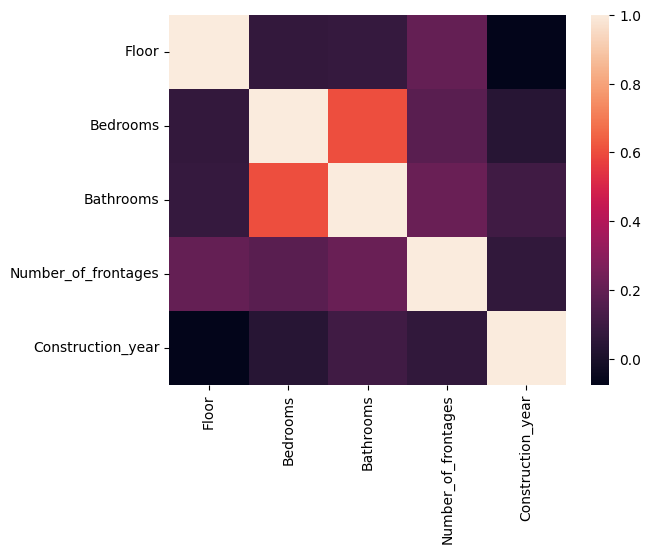

In [13]:
corr = DATA_NUM.corr(method ='pearson')
sns.heatmap(corr)
plt.show()

Histogram for Floor:


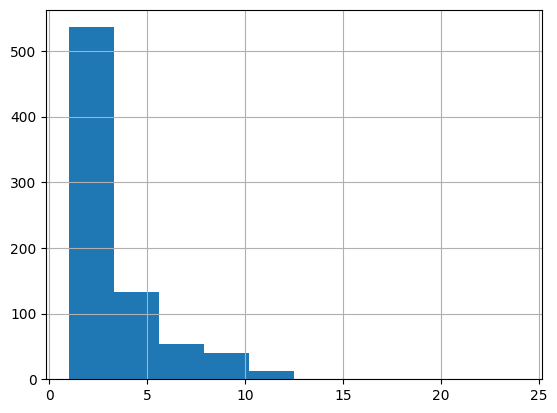

Histogram for Kitchen_type:


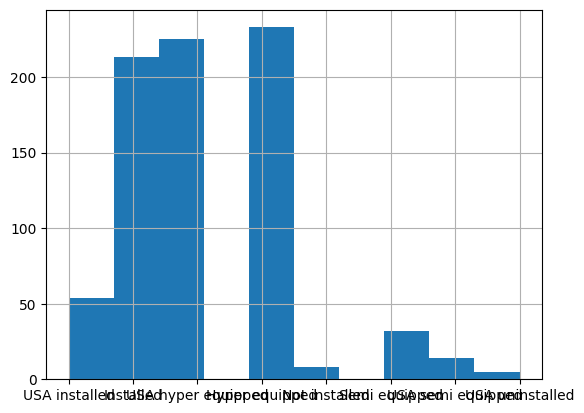

Histogram for Bedrooms:


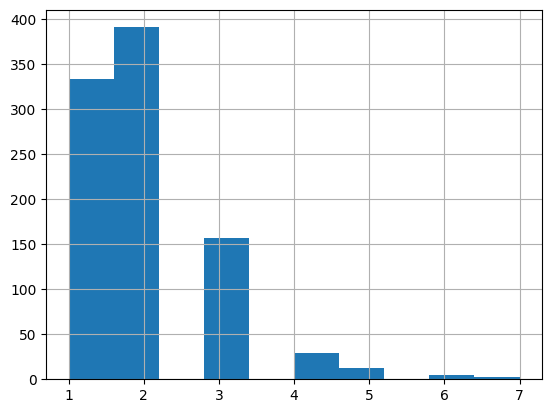

Histogram for Bathrooms:


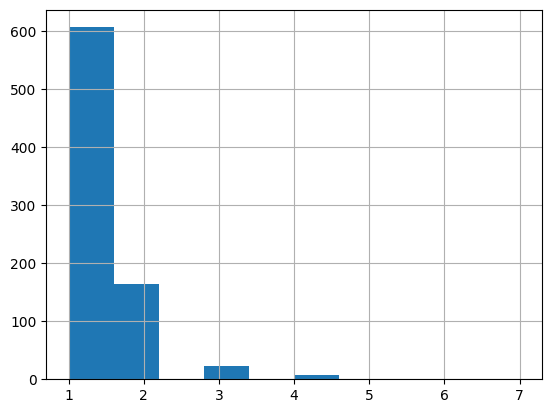

Histogram for Primary_energy_consumption:


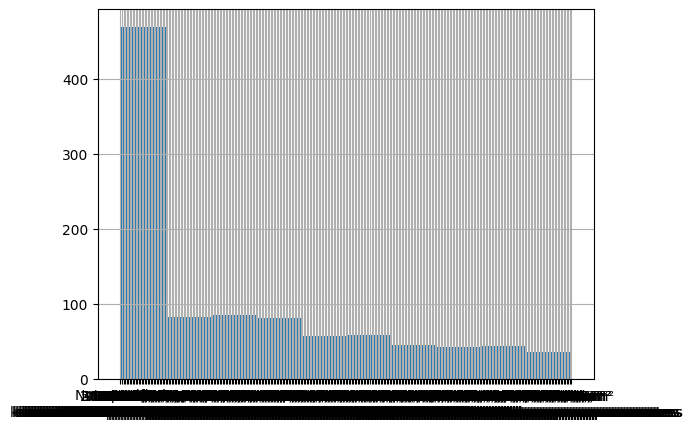

Histogram for Energy_class:


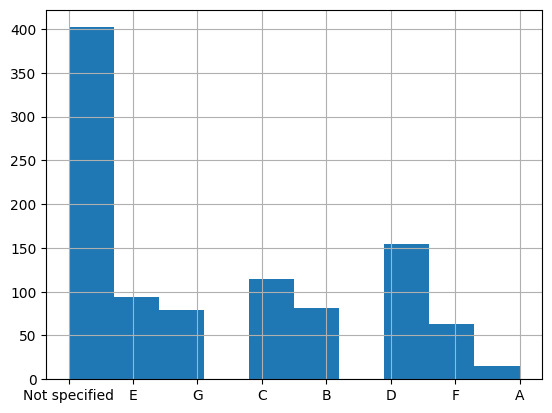

Histogram for CO_emission:


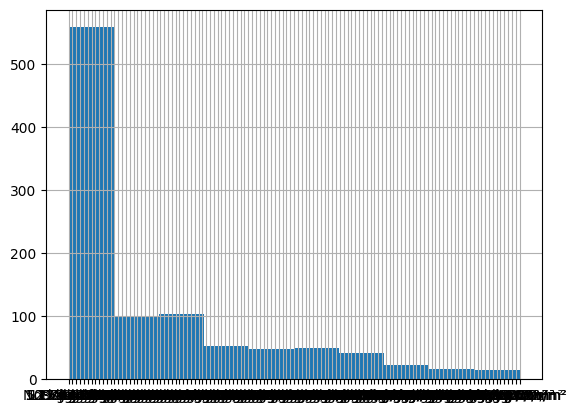

Histogram for Heating_type:


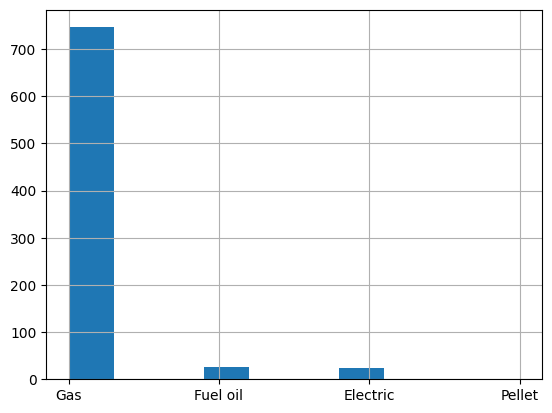

Histogram for Tenement_building:


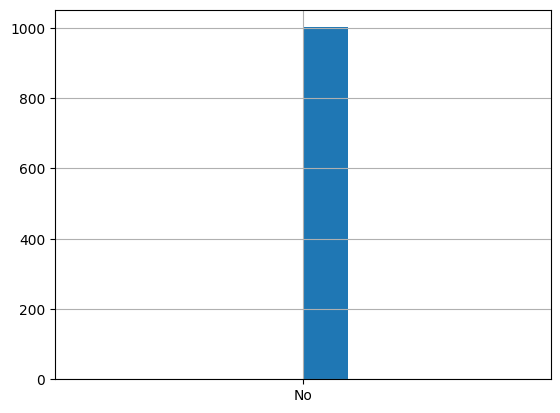

Histogram for space:


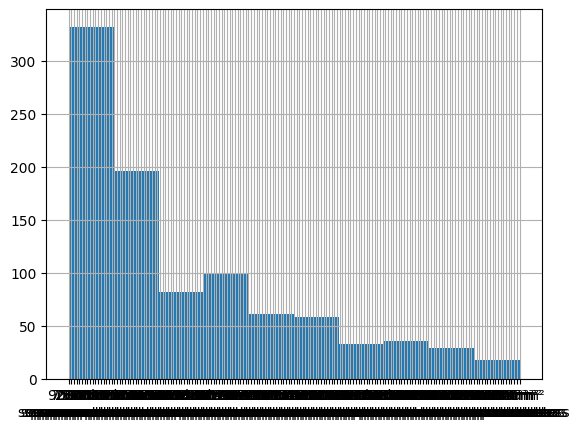

Histogram for listing_type:


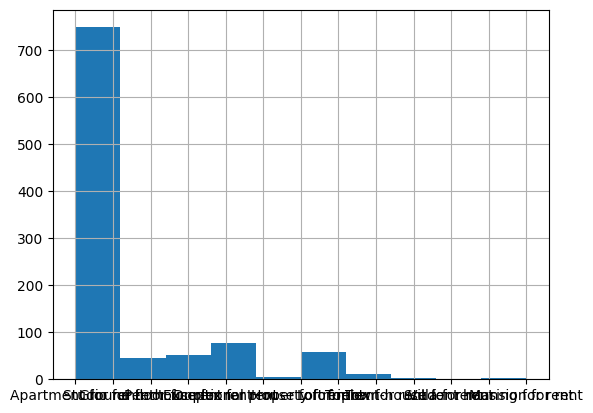

Histogram for Number_of_frontages:


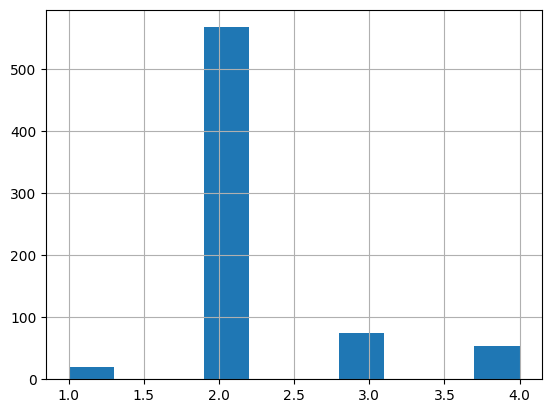

Histogram for Address:


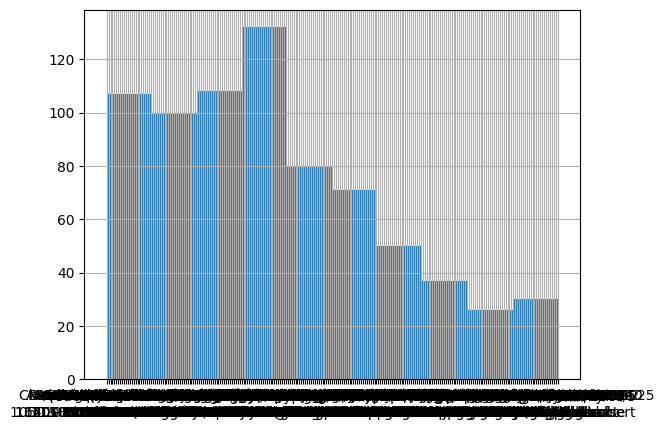

Histogram for Construction_year:


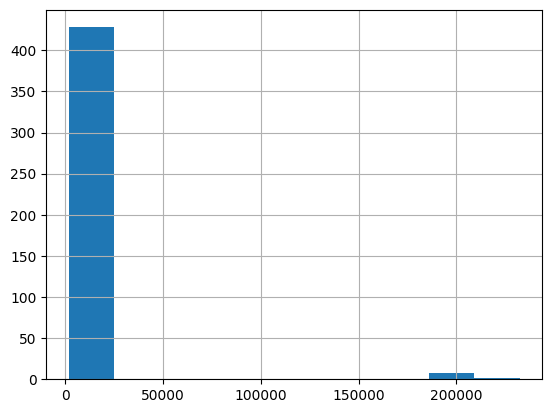

Histogram for Terrace:


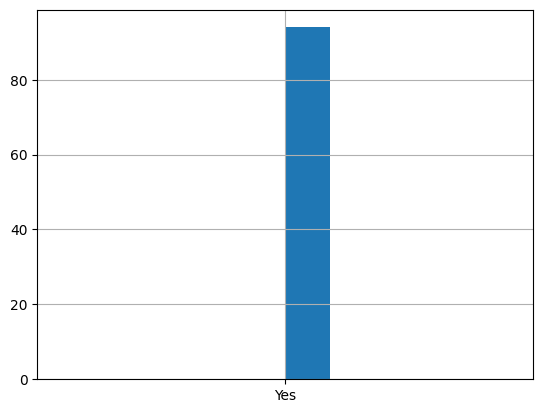

Histogram for price:


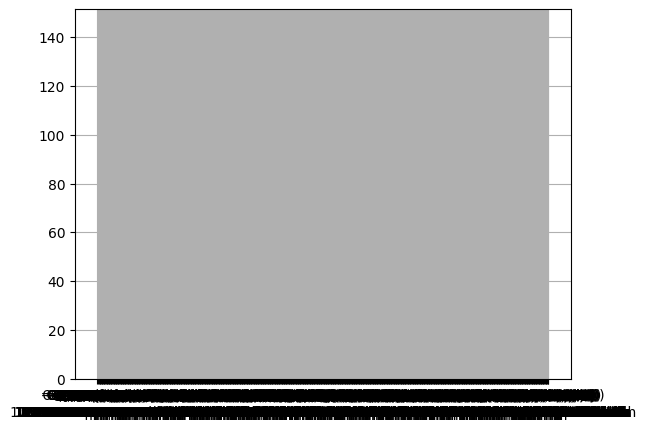

In [14]:
for col in DATA.columns:
    print("Histogram for "+col+":")
    DATA[col].hist()
    plt.show()

In [15]:
PROFILE = ProfileReport(DATA, title="Pandas Profiling Report")
PROFILE

Output hidden; open in https://colab.research.google.com to view.

**2) DQ ASSESSMENT**

In [16]:
for col in DATA.columns:
    print("DQ Assessment for "+col+":")

    DISTINCT = (DATA[col].nunique())
    COUNT = DATA[col].count()
    ROWS = len(DATA[col])
    UNIQUENESS = DISTINCT / ROWS
    print("UNIQUENESS: ", UNIQUENESS)

    DISTINCTNESS = DISTINCT / COUNT
    print("DISTINCTNESS: ", DISTINCTNESS)

    MAX_COUNTS = max(DATA[col].value_counts())
    CONSTANCY = MAX_COUNTS / COUNT
    print("CONSTANCY: ", CONSTANCY)

    NOT_NULL = DATA.count().sum()
    NULL = DATA.isnull().sum().sum()
    TOT = DATA.shape[0]*DATA.shape[1]
    COMPLETENESS = NOT_NULL / TOT
    print("COMPLETENESS: ", COMPLETENESS)

    print("\n\n")

DQ Assessment for Floor:
UNIQUENESS:  0.015968063872255488
DISTINCTNESS:  0.02053915275994865
CONSTANCY:  0.24775353016688062
COMPLETENESS:  0.8133732534930139



DQ Assessment for Kitchen_type:
UNIQUENESS:  0.007984031936127744
DISTINCTNESS:  0.01020408163265306
CONSTANCY:  0.2971938775510204
COMPLETENESS:  0.8133732534930139



DQ Assessment for Bedrooms:
UNIQUENESS:  0.006986027944111776
DISTINCTNESS:  0.007518796992481203
CONSTANCY:  0.41997851772287864
COMPLETENESS:  0.8133732534930139



DQ Assessment for Bathrooms:
UNIQUENESS:  0.005988023952095809
DISTINCTNESS:  0.007462686567164179
CONSTANCY:  0.7549751243781094
COMPLETENESS:  0.8133732534930139



DQ Assessment for Primary_energy_consumption:
UNIQUENESS:  0.3003992015968064
DISTINCTNESS:  0.3003992015968064
CONSTANCY:  0.40119760479041916
COMPLETENESS:  0.8133732534930139



DQ Assessment for Energy_class:
UNIQUENESS:  0.007984031936127744
DISTINCTNESS:  0.007984031936127744
CONSTANCY:  0.40119760479041916
COMPLETENESS:  0.81

**3) DATA CLEANING (DATA TRANSFORMATION)**

In [104]:
DATA.Kitchen_type.unique()


array(['USA installed', 'Installed', 'USA hyper equipped',
       'Hyper equipped', nan, 'Not installed', 'Semi equipped',
       'USA semi equipped', 'USA uninstalled'], dtype=object)

In [105]:
DATA.loc[DATA['Kitchen_type'] == 'USA installed', 'Kitchen_type'] = 'Installed'
DATA.loc[DATA['Kitchen_type'] == 'USA hyper equipped', 'Kitchen_type'] = 'Hyper equipped'
DATA.loc[DATA['Kitchen_type'] == 'USA semi equipped', 'Kitchen_type'] = 'Semi equipped'
DATA.loc[DATA['Kitchen_type'] == 'USA uninstalled', 'Kitchen_type'] = 'Not installed'


In [106]:
DATA.Kitchen_type.unique()


array(['Installed', 'Hyper equipped', nan, 'Not installed',
       'Semi equipped'], dtype=object)

In [107]:
DATA

,Floor,Kitchen_type,Bedrooms,Bathrooms,Primary_energy_consumption,Energy_class,CO_emission,Heating_type,Tenement_building,space,listing_type,Number_of_frontages,Address,Construction_year,Terrace,price
0,2.0,Installed,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,NaN,Apartment for rent,NaN,NaN,NaN,NaN,€750 (+ €30)\n750€ + 30€ per month
1,3.0,Installed,2.0,1.0,Not specified,Not specified,Not specified,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,Rue Des Carmélites 88\n1180 - Uccle,NaN,NaN,"€1,150 (+ €200)\n1150€ + 200€ per month"
2,3.0,Hyper equipped,2.0,1.0,242 kWh/m²\nkilowatt hour per square meters,E,52 kg CO₂/m²,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,NaN,1970.0,NaN,"€1,200 (+ €80)\n1200€ + 80€ per month"
3,3.0,Installed,2.0,1.0,542 kWh/m²\nkilowatt hour per square meters,G,109 kg CO₂/m²,Gas,No,75 m²\nsquare meters,Apartment for rent,2.0,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,NaN,NaN,"€1,050 (+ €50)\n1050€ + 50€ per month"
4,4.0,Hyper equipped,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,70 m²\nsquare meters,Apartment for rent,NaN,NaN,NaN,NaN,€960 (+ €80)\n960€ + 80€ per month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,260 kWh/m²\nkilowatt hour per square meters,E,Not specified,NaN,No,100 m²\nsquare meters,Duplex for rent,NaN,Avenue de l'université 38/40\n1050 - Ixelles,NaN,NaN,"€1,330 (+ €30)\n1330€ + 30€ per month"
998,2.0,Hyper equipped,3.0,1.0,136 kWh/m²\nkilowatt hour per square meters,C,27 kg CO₂/m²,Gas,No,124 m²\nsquare meters,Apartment for rent,2.0,"Val des Seigneurs, 9a\n1150 - Woluwe-St-Pierre",1991.0,NaN,"€1,450/month\n1450€ per month"
999,3.0,Hyper equipped,2.0,2.0,Not specified,Not specified,Not specified,Gas,No,80 m²\nsquare meters,Penthouse for rent,2.0,Rue Louis van Beethoven 25\n1070 - Anderlecht,2022.0,NaN,"€1,250 (+ €80)\n1250€ + 80€ per month"
1000,2.0,Hyper equipped,2.0,2.0,Not specified,Not specified,Not specified,Gas,No,125 m²\nsquare meters,Apartment for rent,2.0,Avenue Louise 523\n1050 - Ixelles,NaN,NaN,"€1,850 (+ €300)\n1850€ + 300€ per month"


In [108]:
DATA[['Energy (kWh/m2)', 'Units']] = DATA.Primary_energy_consumption.str.split(" ", n=1, expand=True)
DATA= DATA.drop(columns=["Primary_energy_consumption"])
DATA

,Floor,Kitchen_type,Bedrooms,Bathrooms,Energy_class,CO_emission,Heating_type,Tenement_building,space,listing_type,Number_of_frontages,Address,Construction_year,Terrace,price,Energy (kWh/m2),Units
0,2.0,Installed,1.0,1.0,Not specified,Not specified,Gas,No,NaN,Apartment for rent,NaN,NaN,NaN,NaN,€750 (+ €30)\n750€ + 30€ per month,Not,specified
1,3.0,Installed,2.0,1.0,Not specified,Not specified,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,Rue Des Carmélites 88\n1180 - Uccle,NaN,NaN,"€1,150 (+ €200)\n1150€ + 200€ per month",Not,specified
2,3.0,Hyper equipped,2.0,1.0,E,52 kg CO₂/m²,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,NaN,1970.0,NaN,"€1,200 (+ €80)\n1200€ + 80€ per month",242,kWh/m²\nkilowatt hour per square meters
3,3.0,Installed,2.0,1.0,G,109 kg CO₂/m²,Gas,No,75 m²\nsquare meters,Apartment for rent,2.0,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,NaN,NaN,"€1,050 (+ €50)\n1050€ + 50€ per month",542,kWh/m²\nkilowatt hour per square meters
4,4.0,Hyper equipped,1.0,1.0,Not specified,Not specified,Gas,No,70 m²\nsquare meters,Apartment for rent,NaN,NaN,NaN,NaN,€960 (+ €80)\n960€ + 80€ per month,Not,specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,E,Not specified,NaN,No,100 m²\nsquare meters,Duplex for rent,NaN,Avenue de l'université 38/40\n1050 - Ixelles,NaN,NaN,"€1,330 (+ €30)\n1330€ + 30€ per month",260,kWh/m²\nkilowatt hour per square meters
998,2.0,Hyper equipped,3.0,1.0,C,27 kg CO₂/m²,Gas,No,124 m²\nsquare meters,Apartment for rent,2.0,"Val des Seigneurs, 9a\n1150 - Woluwe-St-Pierre",1991.0,NaN,"€1,450/month\n1450€ per month",136,kWh/m²\nkilowatt hour per square meters
999,3.0,Hyper equipped,2.0,2.0,Not specified,Not specified,Gas,No,80 m²\nsquare meters,Penthouse for rent,2.0,Rue Louis van Beethoven 25\n1070 - Anderlecht,2022.0,NaN,"€1,250 (+ €80)\n1250€ + 80€ per month",Not,specified
1000,2.0,Hyper equipped,2.0,2.0,Not specified,Not specified,Gas,No,125 m²\nsquare meters,Apartment for rent,2.0,Avenue Louise 523\n1050 - Ixelles,NaN,NaN,"€1,850 (+ €300)\n1850€ + 300€ per month",Not,specified


In [109]:
DATA.loc[DATA['Energy (kWh/m2)'] == 'Not', 'Energy (kWh/m2)'] = np.NAN
DATA= DATA.drop(columns=["Units"])
DATA


,Floor,Kitchen_type,Bedrooms,Bathrooms,Energy_class,CO_emission,Heating_type,Tenement_building,space,listing_type,Number_of_frontages,Address,Construction_year,Terrace,price,Energy (kWh/m2)
0,2.0,Installed,1.0,1.0,Not specified,Not specified,Gas,No,NaN,Apartment for rent,NaN,NaN,NaN,NaN,€750 (+ €30)\n750€ + 30€ per month,NaN
1,3.0,Installed,2.0,1.0,Not specified,Not specified,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,Rue Des Carmélites 88\n1180 - Uccle,NaN,NaN,"€1,150 (+ €200)\n1150€ + 200€ per month",NaN
2,3.0,Hyper equipped,2.0,1.0,E,52 kg CO₂/m²,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,NaN,1970.0,NaN,"€1,200 (+ €80)\n1200€ + 80€ per month",242
3,3.0,Installed,2.0,1.0,G,109 kg CO₂/m²,Gas,No,75 m²\nsquare meters,Apartment for rent,2.0,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,NaN,NaN,"€1,050 (+ €50)\n1050€ + 50€ per month",542
4,4.0,Hyper equipped,1.0,1.0,Not specified,Not specified,Gas,No,70 m²\nsquare meters,Apartment for rent,NaN,NaN,NaN,NaN,€960 (+ €80)\n960€ + 80€ per month,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,E,Not specified,NaN,No,100 m²\nsquare meters,Duplex for rent,NaN,Avenue de l'université 38/40\n1050 - Ixelles,NaN,NaN,"€1,330 (+ €30)\n1330€ + 30€ per month",260
998,2.0,Hyper equipped,3.0,1.0,C,27 kg CO₂/m²,Gas,No,124 m²\nsquare meters,Apartment for rent,2.0,"Val des Seigneurs, 9a\n1150 - Woluwe-St-Pierre",1991.0,NaN,"€1,450/month\n1450€ per month",136
999,3.0,Hyper equipped,2.0,2.0,Not specified,Not specified,Gas,No,80 m²\nsquare meters,Penthouse for rent,2.0,Rue Louis van Beethoven 25\n1070 - Anderlecht,2022.0,NaN,"€1,250 (+ €80)\n1250€ + 80€ per month",NaN
1000,2.0,Hyper equipped,2.0,2.0,Not specified,Not specified,Gas,No,125 m²\nsquare meters,Apartment for rent,2.0,Avenue Louise 523\n1050 - Ixelles,NaN,NaN,"€1,850 (+ €300)\n1850€ + 300€ per month",NaN


In [110]:
DATA[['CO2 (CO2/m2)', 'Units']] = DATA.CO_emission.str.split(" ", n=1, expand=True)
DATA= DATA.drop(columns=["CO_emission"])
DATA.loc[DATA['CO2 (CO2/m2)'] == 'Not', 'CO2 (CO2/m2)'] = np.NAN
DATA= DATA.drop(columns=["Units"])
DATA


,Floor,Kitchen_type,Bedrooms,Bathrooms,Energy_class,Heating_type,Tenement_building,space,listing_type,Number_of_frontages,Address,Construction_year,Terrace,price,Energy (kWh/m2),CO2 (CO2/m2)
0,2.0,Installed,1.0,1.0,Not specified,Gas,No,NaN,Apartment for rent,NaN,NaN,NaN,NaN,€750 (+ €30)\n750€ + 30€ per month,NaN,NaN
1,3.0,Installed,2.0,1.0,Not specified,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,Rue Des Carmélites 88\n1180 - Uccle,NaN,NaN,"€1,150 (+ €200)\n1150€ + 200€ per month",NaN,NaN
2,3.0,Hyper equipped,2.0,1.0,E,Gas,No,90 m²\nsquare meters,Apartment for rent,2.0,NaN,1970.0,NaN,"€1,200 (+ €80)\n1200€ + 80€ per month",242,52
3,3.0,Installed,2.0,1.0,G,Gas,No,75 m²\nsquare meters,Apartment for rent,2.0,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,NaN,NaN,"€1,050 (+ €50)\n1050€ + 50€ per month",542,109
4,4.0,Hyper equipped,1.0,1.0,Not specified,Gas,No,70 m²\nsquare meters,Apartment for rent,NaN,NaN,NaN,NaN,€960 (+ €80)\n960€ + 80€ per month,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,E,NaN,No,100 m²\nsquare meters,Duplex for rent,NaN,Avenue de l'université 38/40\n1050 - Ixelles,NaN,NaN,"€1,330 (+ €30)\n1330€ + 30€ per month",260,NaN
998,2.0,Hyper equipped,3.0,1.0,C,Gas,No,124 m²\nsquare meters,Apartment for rent,2.0,"Val des Seigneurs, 9a\n1150 - Woluwe-St-Pierre",1991.0,NaN,"€1,450/month\n1450€ per month",136,27
999,3.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,80 m²\nsquare meters,Penthouse for rent,2.0,Rue Louis van Beethoven 25\n1070 - Anderlecht,2022.0,NaN,"€1,250 (+ €80)\n1250€ + 80€ per month",NaN,NaN
1000,2.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,125 m²\nsquare meters,Apartment for rent,2.0,Avenue Louise 523\n1050 - Ixelles,NaN,NaN,"€1,850 (+ €300)\n1850€ + 300€ per month",NaN,NaN


In [111]:
DATA[['Space (m2)', 'Units']] = DATA.space.str.split(" ", n=1, expand=True)
DATA= DATA.drop(columns=["space","Units"])
DATA


,Floor,Kitchen_type,Bedrooms,Bathrooms,Energy_class,Heating_type,Tenement_building,listing_type,Number_of_frontages,Address,Construction_year,Terrace,price,Energy (kWh/m2),CO2 (CO2/m2),Space (m2)
0,2.0,Installed,1.0,1.0,Not specified,Gas,No,Apartment for rent,NaN,NaN,NaN,NaN,€750 (+ €30)\n750€ + 30€ per month,NaN,NaN,NaN
1,3.0,Installed,2.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,Rue Des Carmélites 88\n1180 - Uccle,NaN,NaN,"€1,150 (+ €200)\n1150€ + 200€ per month",NaN,NaN,90
2,3.0,Hyper equipped,2.0,1.0,E,Gas,No,Apartment for rent,2.0,NaN,1970.0,NaN,"€1,200 (+ €80)\n1200€ + 80€ per month",242,52,90
3,3.0,Installed,2.0,1.0,G,Gas,No,Apartment for rent,2.0,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,NaN,NaN,"€1,050 (+ €50)\n1050€ + 50€ per month",542,109,75
4,4.0,Hyper equipped,1.0,1.0,Not specified,Gas,No,Apartment for rent,NaN,NaN,NaN,NaN,€960 (+ €80)\n960€ + 80€ per month,NaN,NaN,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,E,NaN,No,Duplex for rent,NaN,Avenue de l'université 38/40\n1050 - Ixelles,NaN,NaN,"€1,330 (+ €30)\n1330€ + 30€ per month",260,NaN,100
998,2.0,Hyper equipped,3.0,1.0,C,Gas,No,Apartment for rent,2.0,"Val des Seigneurs, 9a\n1150 - Woluwe-St-Pierre",1991.0,NaN,"€1,450/month\n1450€ per month",136,27,124
999,3.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,Penthouse for rent,2.0,Rue Louis van Beethoven 25\n1070 - Anderlecht,2022.0,NaN,"€1,250 (+ €80)\n1250€ + 80€ per month",NaN,NaN,80
1000,2.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,Apartment for rent,2.0,Avenue Louise 523\n1050 - Ixelles,NaN,NaN,"€1,850 (+ €300)\n1850€ + 300€ per month",NaN,NaN,125


In [112]:
DATA[['Address 1', 'Address 2']] = DATA.Address.str.split("\n", n=1, expand=True)
DATA= DATA.drop(columns=["Address"])
DATA


,Floor,Kitchen_type,Bedrooms,Bathrooms,Energy_class,Heating_type,Tenement_building,listing_type,Number_of_frontages,Construction_year,Terrace,price,Energy (kWh/m2),CO2 (CO2/m2),Space (m2),Address 1,Address 2
0,2.0,Installed,1.0,1.0,Not specified,Gas,No,Apartment for rent,NaN,NaN,NaN,€750 (+ €30)\n750€ + 30€ per month,NaN,NaN,NaN,NaN,NaN
1,3.0,Installed,2.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,"€1,150 (+ €200)\n1150€ + 200€ per month",NaN,NaN,90,Rue Des Carmélites 88,1180 - Uccle
2,3.0,Hyper equipped,2.0,1.0,E,Gas,No,Apartment for rent,2.0,1970.0,NaN,"€1,200 (+ €80)\n1200€ + 80€ per month",242,52,90,NaN,NaN
3,3.0,Installed,2.0,1.0,G,Gas,No,Apartment for rent,2.0,NaN,NaN,"€1,050 (+ €50)\n1050€ + 50€ per month",542,109,75,Avenue Broqueville 1,1150 - Woluwe-Saint-Pierre
4,4.0,Hyper equipped,1.0,1.0,Not specified,Gas,No,Apartment for rent,NaN,NaN,NaN,€960 (+ €80)\n960€ + 80€ per month,NaN,NaN,70,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,E,NaN,No,Duplex for rent,NaN,NaN,NaN,"€1,330 (+ €30)\n1330€ + 30€ per month",260,NaN,100,Avenue de l'université 38/40,1050 - Ixelles
998,2.0,Hyper equipped,3.0,1.0,C,Gas,No,Apartment for rent,2.0,1991.0,NaN,"€1,450/month\n1450€ per month",136,27,124,"Val des Seigneurs, 9a",1150 - Woluwe-St-Pierre
999,3.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,Penthouse for rent,2.0,2022.0,NaN,"€1,250 (+ €80)\n1250€ + 80€ per month",NaN,NaN,80,Rue Louis van Beethoven 25,1070 - Anderlecht
1000,2.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,"€1,850 (+ €300)\n1850€ + 300€ per month",NaN,NaN,125,Avenue Louise 523,1050 - Ixelles


In [113]:
DATA[['Price', 'Others']] = DATA.price.str.split("\n", n=1, expand=True)
DATA= DATA.drop(columns=["price","Price"])
DATA


,Floor,Kitchen_type,Bedrooms,Bathrooms,Energy_class,Heating_type,Tenement_building,listing_type,Number_of_frontages,Construction_year,Terrace,Energy (kWh/m2),CO2 (CO2/m2),Space (m2),Address 1,Address 2,Others
0,2.0,Installed,1.0,1.0,Not specified,Gas,No,Apartment for rent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750€ + 30€ per month
1,3.0,Installed,2.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,NaN,NaN,90,Rue Des Carmélites 88,1180 - Uccle,1150€ + 200€ per month
2,3.0,Hyper equipped,2.0,1.0,E,Gas,No,Apartment for rent,2.0,1970.0,NaN,242,52,90,NaN,NaN,1200€ + 80€ per month
3,3.0,Installed,2.0,1.0,G,Gas,No,Apartment for rent,2.0,NaN,NaN,542,109,75,Avenue Broqueville 1,1150 - Woluwe-Saint-Pierre,1050€ + 50€ per month
4,4.0,Hyper equipped,1.0,1.0,Not specified,Gas,No,Apartment for rent,NaN,NaN,NaN,NaN,NaN,70,NaN,NaN,960€ + 80€ per month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,E,NaN,No,Duplex for rent,NaN,NaN,NaN,260,NaN,100,Avenue de l'université 38/40,1050 - Ixelles,1330€ + 30€ per month
998,2.0,Hyper equipped,3.0,1.0,C,Gas,No,Apartment for rent,2.0,1991.0,NaN,136,27,124,"Val des Seigneurs, 9a",1150 - Woluwe-St-Pierre,1450€ per month
999,3.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,Penthouse for rent,2.0,2022.0,NaN,NaN,NaN,80,Rue Louis van Beethoven 25,1070 - Anderlecht,1250€ + 80€ per month
1000,2.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,NaN,NaN,125,Avenue Louise 523,1050 - Ixelles,1850€ + 300€ per month


In [114]:
DATA[['Price', 'Additional_price']] = DATA.Others.str.split("+", n=1, expand=True)
DATA


,Floor,Kitchen_type,Bedrooms,Bathrooms,Energy_class,Heating_type,Tenement_building,listing_type,Number_of_frontages,Construction_year,Terrace,Energy (kWh/m2),CO2 (CO2/m2),Space (m2),Address 1,Address 2,Others,Price,Additional_price
0,2.0,Installed,1.0,1.0,Not specified,Gas,No,Apartment for rent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750€ + 30€ per month,750€,30€ per month
1,3.0,Installed,2.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,NaN,NaN,90,Rue Des Carmélites 88,1180 - Uccle,1150€ + 200€ per month,1150€,200€ per month
2,3.0,Hyper equipped,2.0,1.0,E,Gas,No,Apartment for rent,2.0,1970.0,NaN,242,52,90,NaN,NaN,1200€ + 80€ per month,1200€,80€ per month
3,3.0,Installed,2.0,1.0,G,Gas,No,Apartment for rent,2.0,NaN,NaN,542,109,75,Avenue Broqueville 1,1150 - Woluwe-Saint-Pierre,1050€ + 50€ per month,1050€,50€ per month
4,4.0,Hyper equipped,1.0,1.0,Not specified,Gas,No,Apartment for rent,NaN,NaN,NaN,NaN,NaN,70,NaN,NaN,960€ + 80€ per month,960€,80€ per month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,E,NaN,No,Duplex for rent,NaN,NaN,NaN,260,NaN,100,Avenue de l'université 38/40,1050 - Ixelles,1330€ + 30€ per month,1330€,30€ per month
998,2.0,Hyper equipped,3.0,1.0,C,Gas,No,Apartment for rent,2.0,1991.0,NaN,136,27,124,"Val des Seigneurs, 9a",1150 - Woluwe-St-Pierre,1450€ per month,1450€ per month,None
999,3.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,Penthouse for rent,2.0,2022.0,NaN,NaN,NaN,80,Rue Louis van Beethoven 25,1070 - Anderlecht,1250€ + 80€ per month,1250€,80€ per month
1000,2.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,NaN,NaN,125,Avenue Louise 523,1050 - Ixelles,1850€ + 300€ per month,1850€,300€ per month


In [115]:
DATA[['Price', 'Units']] = DATA.Price.str.split("€", n=1, expand=True)
DATA= DATA.drop(columns=["Units"])

DATA[['Additional_price', 'Units']] = DATA.Additional_price.str.split("€", n=1, expand=True)
DATA= DATA.drop(columns=["Units"])
DATA


,Floor,Kitchen_type,Bedrooms,Bathrooms,Energy_class,Heating_type,Tenement_building,listing_type,Number_of_frontages,Construction_year,Terrace,Energy (kWh/m2),CO2 (CO2/m2),Space (m2),Address 1,Address 2,Others,Price,Additional_price
0,2.0,Installed,1.0,1.0,Not specified,Gas,No,Apartment for rent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750€ + 30€ per month,750,30
1,3.0,Installed,2.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,NaN,NaN,90,Rue Des Carmélites 88,1180 - Uccle,1150€ + 200€ per month,1150,200
2,3.0,Hyper equipped,2.0,1.0,E,Gas,No,Apartment for rent,2.0,1970.0,NaN,242,52,90,NaN,NaN,1200€ + 80€ per month,1200,80
3,3.0,Installed,2.0,1.0,G,Gas,No,Apartment for rent,2.0,NaN,NaN,542,109,75,Avenue Broqueville 1,1150 - Woluwe-Saint-Pierre,1050€ + 50€ per month,1050,50
4,4.0,Hyper equipped,1.0,1.0,Not specified,Gas,No,Apartment for rent,NaN,NaN,NaN,NaN,NaN,70,NaN,NaN,960€ + 80€ per month,960,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,E,NaN,No,Duplex for rent,NaN,NaN,NaN,260,NaN,100,Avenue de l'université 38/40,1050 - Ixelles,1330€ + 30€ per month,1330,30
998,2.0,Hyper equipped,3.0,1.0,C,Gas,No,Apartment for rent,2.0,1991.0,NaN,136,27,124,"Val des Seigneurs, 9a",1150 - Woluwe-St-Pierre,1450€ per month,1450,None
999,3.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,Penthouse for rent,2.0,2022.0,NaN,NaN,NaN,80,Rue Louis van Beethoven 25,1070 - Anderlecht,1250€ + 80€ per month,1250,80
1000,2.0,Hyper equipped,2.0,2.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,NaN,NaN,125,Avenue Louise 523,1050 - Ixelles,1850€ + 300€ per month,1850,300


In [116]:
DATA["Space (m2)"] = DATA["Space (m2)"].astype("float64")
DATA["Energy (kWh/m2)"] = DATA["Energy (kWh/m2)"].astype("float64")
DATA["CO2 (CO2/m2)"] = DATA["CO2 (CO2/m2)"].astype("float64")
DATA["Price"] = DATA["Price"].astype("float64")

**4) DATA CLEANING (ERROR DETECTION&CORRECTION MISSING VALUES)**

In [117]:
DATA.Floor = DATA["Floor"].fillna(0)


In [118]:
DATA.Kitchen_type = DATA["Kitchen_type"].fillna(DATA["Kitchen_type"].mode()[0])


In [119]:
DATA.Bedrooms = DATA["Bedrooms"].fillna(round(DATA["Bedrooms"].mean()))

In [120]:
DATASET_FOR_RULES = DATA[["Bedrooms","Bathrooms"]]
DATASET_FOR_RULES


,Bedrooms,Bathrooms
0,1.0,1.0
1,2.0,1.0
2,2.0,1.0
3,2.0,1.0
4,1.0,1.0
...,...,...
997,2.0,1.0
998,3.0,1.0
999,2.0,2.0
1000,2.0,2.0


In [121]:
rules(DATASET_FOR_RULES,0.1,0.3)


[{('1.0', 1)} -> {('1.0', 0)}, {('1.0', 0)} -> {('1.0', 1)}, {('2.0', 0)} -> {('1.0', 1)}, {('1.0', 1)} -> {('2.0', 0)}]


[{('1.0', 1)} -> {('1.0', 0)},
 {('1.0', 0)} -> {('1.0', 1)},
 {('2.0', 0)} -> {('1.0', 1)},
 {('1.0', 1)} -> {('2.0', 0)}]

In [122]:
DATA.loc[DATA['Bedrooms'] == 1, 'Bathrooms'] = 1
DATA.loc[DATA['Bedrooms'] == 2, 'Bathrooms'] = 1


In [123]:
DATA["Bathrooms"].isnull().sum()


13

In [124]:
DATA.Bathrooms = DATA["Bathrooms"].fillna(round(DATA["Bathrooms"].mean()))
DATA.Number_of_frontages = DATA["Number_of_frontages"].fillna(round(DATA["Number_of_frontages"].mean()))

In [125]:
DATA.Heating_type = DATA["Heating_type"].fillna(DATA["Heating_type"].mode()[0])


In [126]:
DATA

,Floor,Kitchen_type,Bedrooms,Bathrooms,Energy_class,Heating_type,Tenement_building,listing_type,Number_of_frontages,Construction_year,Terrace,Energy (kWh/m2),CO2 (CO2/m2),Space (m2),Address 1,Address 2,Others,Price,Additional_price
0,2.0,Installed,1.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750€ + 30€ per month,750.0,30
1,3.0,Installed,2.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,NaN,NaN,90.0,Rue Des Carmélites 88,1180 - Uccle,1150€ + 200€ per month,1150.0,200
2,3.0,Hyper equipped,2.0,1.0,E,Gas,No,Apartment for rent,2.0,1970.0,NaN,242.0,52.0,90.0,NaN,NaN,1200€ + 80€ per month,1200.0,80
3,3.0,Installed,2.0,1.0,G,Gas,No,Apartment for rent,2.0,NaN,NaN,542.0,109.0,75.0,Avenue Broqueville 1,1150 - Woluwe-Saint-Pierre,1050€ + 50€ per month,1050.0,50
4,4.0,Hyper equipped,1.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,NaN,NaN,70.0,NaN,NaN,960€ + 80€ per month,960.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,E,Gas,No,Duplex for rent,2.0,NaN,NaN,260.0,NaN,100.0,Avenue de l'université 38/40,1050 - Ixelles,1330€ + 30€ per month,1330.0,30
998,2.0,Hyper equipped,3.0,1.0,C,Gas,No,Apartment for rent,2.0,1991.0,NaN,136.0,27.0,124.0,"Val des Seigneurs, 9a",1150 - Woluwe-St-Pierre,1450€ per month,1450.0,None
999,3.0,Hyper equipped,2.0,1.0,Not specified,Gas,No,Penthouse for rent,2.0,2022.0,NaN,NaN,NaN,80.0,Rue Louis van Beethoven 25,1070 - Anderlecht,1250€ + 80€ per month,1250.0,80
1000,2.0,Hyper equipped,2.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,NaN,NaN,NaN,NaN,125.0,Avenue Louise 523,1050 - Ixelles,1850€ + 300€ per month,1850.0,300


In [127]:
DATA["Space (m2)"] = DATA["Space (m2)"].fillna(DATA["Space (m2)"].mean())

In [128]:
DATA["Address 1"] = DATA["Address 1"].fillna("Not specified")
DATA["Address 2"] = DATA["Address 2"].fillna("Not specified")

DATA.Construction_year = DATA["Construction_year"].fillna(0)
DATA.Terrace = DATA["Terrace"].fillna("No")

DATA["Energy (kWh/m2)"] = DATA["Energy (kWh/m2)"].fillna(DATA["Energy (kWh/m2)"].mean())
DATA["CO2 (CO2/m2)"] = DATA["CO2 (CO2/m2)"].fillna(DATA["CO2 (CO2/m2)"].mean())

In [129]:
DATA.isnull().sum()


,0
Floor,0
Kitchen_type,0
Bedrooms,0
Bathrooms,0
Energy_class,0
Heating_type,0
Tenement_building,0
listing_type,0
Number_of_frontages,0
Construction_year,0


**5) DATA CLEANING (ERROR DETECTION&CORRECTION OUTLIERS)**

In [130]:
ZS(DATA["Construction_year"], 1)


The detected outliers are:  [202020.0, 202020.0, 202020.0, 202020.0, 202020.0, 232323.0, 202020.0, 202020.0, 202020.0, 232323.0]


In [131]:
DATA = DATA[DATA['Construction_year'] <= 2023]


**6) DATA CLEANING (DATA DEDUPLICATION)**

In [132]:
!pip install recordlinkage

In [133]:
import recordlinkage

In [134]:
DATA = DATA.drop_duplicates()
DATA

,Floor,Kitchen_type,Bedrooms,Bathrooms,Energy_class,Heating_type,Tenement_building,listing_type,Number_of_frontages,Construction_year,Terrace,Energy (kWh/m2),CO2 (CO2/m2),Space (m2),Address 1,Address 2,Others,Price,Additional_price
0,2.0,Installed,1.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,0.0,No,260.557533,51.779352,102.052854,Not specified,Not specified,750€ + 30€ per month,750.0,30
1,3.0,Installed,2.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,0.0,No,260.557533,51.779352,90.000000,Rue Des Carmélites 88,1180 - Uccle,1150€ + 200€ per month,1150.0,200
2,3.0,Hyper equipped,2.0,1.0,E,Gas,No,Apartment for rent,2.0,1970.0,No,242.000000,52.000000,90.000000,Not specified,Not specified,1200€ + 80€ per month,1200.0,80
3,3.0,Installed,2.0,1.0,G,Gas,No,Apartment for rent,2.0,0.0,No,542.000000,109.000000,75.000000,Avenue Broqueville 1,1150 - Woluwe-Saint-Pierre,1050€ + 50€ per month,1050.0,50
4,4.0,Hyper equipped,1.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,0.0,No,260.557533,51.779352,70.000000,Not specified,Not specified,960€ + 80€ per month,960.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,E,Gas,No,Duplex for rent,2.0,0.0,No,260.000000,51.779352,100.000000,Avenue de l'université 38/40,1050 - Ixelles,1330€ + 30€ per month,1330.0,30
998,2.0,Hyper equipped,3.0,1.0,C,Gas,No,Apartment for rent,2.0,1991.0,No,136.000000,27.000000,124.000000,"Val des Seigneurs, 9a",1150 - Woluwe-St-Pierre,1450€ per month,1450.0,None
999,3.0,Hyper equipped,2.0,1.0,Not specified,Gas,No,Penthouse for rent,2.0,2022.0,No,260.557533,51.779352,80.000000,Rue Louis van Beethoven 25,1070 - Anderlecht,1250€ + 80€ per month,1250.0,80
1000,2.0,Hyper equipped,2.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,0.0,No,260.557533,51.779352,125.000000,Avenue Louise 523,1050 - Ixelles,1850€ + 300€ per month,1850.0,300


In [135]:
indexer = recordlinkage.index.SortedNeighbourhood(
        on='Address 1', window=9)

candidate_links = indexer.index(DATA)
candidate_links

<ipython-input-135-f88dc181931d>:1: DeprecationWarning: The argument 'on' is deprecated. Use 'left_on=...' and 'right_on=None' to simulate the behaviour of 'on'.
  indexer = recordlinkage.index.SortedNeighbourhood(


MultiIndex([(  36,   0),
            (  36,   2),
            (  36,   4),
            (  36,   7),
            (  36,   8),
            (  36,  17),
            (  36,  18),
            (  36,  19),
            (  36,  20),
            (  36,  21),
            ...
            ( 999, 706),
            ( 999, 707),
            ( 999, 708),
            ( 999, 709),
            ( 999, 950),
            (1000, 448),
            (1001, 241),
            (1001, 563),
            (1001, 727),
            (1001, 887)],
           length=53483)

In [136]:
DATA.columns

Index(['Floor', 'Kitchen_type', 'Bedrooms', 'Bathrooms', 'Energy_class',
       'Heating_type', 'Tenement_building', 'listing_type',
       'Number_of_frontages', 'Construction_year', 'Terrace',
       'Energy (kWh/m2)', 'CO2 (CO2/m2)', 'Space (m2)', 'Address 1',
       'Address 2', 'Others', 'Price', 'Additional_price'],
      dtype='object')

In [137]:
compare_cl = recordlinkage.Compare()

compare_cl.exact('Bedrooms', 'Bedrooms', label='Bedrooms')
compare_cl.exact('Bathrooms', 'Bathrooms', label='Bathrooms')
compare_cl.exact('Energy_class', 'Energy_class', label='Energy_class')
compare_cl.exact('listing_type', 'listing_type', label='listing_type')
compare_cl.exact('Number_of_frontages', 'Number_of_frontages', label='Number_of_frontages')
compare_cl.exact('Construction_year', 'Construction_year', label='Construction_year')
compare_cl.exact('Terrace', 'Terrace', label='Terrace')
compare_cl.exact('Energy (kWh/m2)', 'Energy (kWh/m2)', label='Energy (kWh/m2)')
compare_cl.exact('CO2 (CO2/m2)', 'CO2 (CO2/m2)', label='CO2 (CO2/m2)')
compare_cl.exact('Space (m2)', 'Space (m2)', label='Space (m2)')
compare_cl.exact('Address 1', 'Address 1', label='Address 1')
compare_cl.exact('Address 2', 'Address 2', label='Address 2')
compare_cl.exact('Price', 'Price', label='Price')

compare_cl.string('Kitchen_type', 'Kitchen_type', method='jarowinkler', threshold=0.9, label='Kitchen_type')
compare_cl.string('Tenement_building', 'Tenement_building', method='jarowinkler', threshold=0.9, label='Tenement_building')


features = compare_cl.compute(candidate_links, DATA)
matches = features[features.sum(axis=1) > 14]

matches

Bedrooms  Bathrooms  Energy_class  listing_type  Number_of_frontages  \
27  1           1          1             1             1                    1   
51  23          1          1             1             1                    1   
83  64          1          1             1             1                    1   
85  63          1          1             1             1                    1   
92  0           1          1             1             1                    1   
502 282         1          1             1             1                    1   
575 573         1          1             1             1                    1   
578 576         1          1             1             1                    1   
579 573         1          1             1             1                    1   
    575         1          1             1             1                    1   
816 273         1          1             1             1                    1   
840 49          1          1             1             1                    1   
942 941         1          1             1             1                    1   

         Construction_year  Terrace  Energy (kWh/m2)  CO2 (CO2/m2)  \
27  1                    1        1                1             1   
51  23                   1        1                1             1   
83  64                   1        1                1             1   
85  63                   1        1                1             1   
92  0                    1        1                1             1   
502 282                  1        1                1             1   
575 573                  1        1                1             1   
578 576                  1        1                1             1   
579 573                  1        1                1             1   
    575                  1        1                1             1   
816 273                  1        1                1             1   
840 49                   1        1                1             1   
942 941                  1        1                1             1   

         Space (m2)  Address 1  Address 2  Price  Kitchen_type  \
27  1             1          1          1      1           1.0   
51  23            1          1          1      1           1.0   
83  64            1          1          1      1           1.0   
85  63            1          1          1      1           1.0   
92  0             1          1          1      1           1.0   
502 282           1          1          1      1           1.0   
575 573           1          1          1      1           1.0   
578 576           1          1          1      1           1.0   
579 573           1          1          1      1           1.0   
    575           1          1          1      1           1.0   
816 273           1          1          1      1           1.0   
840 49            1          1          1      1           1.0   
942 941           1          1          1      1           1.0   

         Tenement_building  
27  1                  1.0  
51  23                 1.0  
83  64                 1.0  
85  63                 1.0  
92  0                  1.0  
502 282                1.0  
575 573                1.0  
578 576                1.0  
579 573                1.0  
    575                1.0  
816 273                1.0  
840 49                 1.0  
942 941                1.0

In [138]:
matches.index

MultiIndex([( 27,   1),
            ( 51,  23),
            ( 83,  64),
            ( 85,  63),
            ( 92,   0),
            (502, 282),
            (575, 573),
            (578, 576),
            (579, 573),
            (579, 575),
            (816, 273),
            (840,  49),
            (942, 941)],
           )

In [139]:
for i in matches.index:
    print(DATA.iloc[[i[0],i[1]]])

    Floor Kitchen_type  Bedrooms  Bathrooms   Energy_class Heating_type  \
27    0.0    Installed       2.0        1.0  Not specified          Gas   
1     3.0    Installed       2.0        1.0  Not specified          Gas   

   Tenement_building        listing_type  Number_of_frontages  \
27                No  Apartment for rent                  2.0   
1                 No  Apartment for rent                  2.0   

    Construction_year Terrace  Energy (kWh/m2)  CO2 (CO2/m2)  Space (m2)  \
27                0.0      No       260.557533     51.779352        90.0   
1                 0.0      No       260.557533     51.779352        90.0   

                Address 1     Address 2                  Others   Price  \
27  Rue Des Carmélites 88  1180 - Uccle  1150€ + 200€ per month  1150.0   
1   Rue Des Carmélites 88  1180 - Uccle  1150€ + 200€ per month  1150.0   

   Additional_price  
27              200  
1               200  
    Floor Kitchen_type  Bedrooms  Bathrooms Energy_class 

In [140]:
DATA_DROP_DUPLICATES = DATA.copy()
indexes = []
for i in matches.index:
    if i[1] not in indexes:
        DATA_DROP_DUPLICATES = DATA_DROP_DUPLICATES.drop([i[1]])
    indexes.append(i[1])

In [141]:
DATA_DROP_DUPLICATES


,Floor,Kitchen_type,Bedrooms,Bathrooms,Energy_class,Heating_type,Tenement_building,listing_type,Number_of_frontages,Construction_year,Terrace,Energy (kWh/m2),CO2 (CO2/m2),Space (m2),Address 1,Address 2,Others,Price,Additional_price
2,3.0,Hyper equipped,2.0,1.0,E,Gas,No,Apartment for rent,2.0,1970.0,No,242.000000,52.000000,90.0,Not specified,Not specified,1200€ + 80€ per month,1200.0,80
3,3.0,Installed,2.0,1.0,G,Gas,No,Apartment for rent,2.0,0.0,No,542.000000,109.000000,75.0,Avenue Broqueville 1,1150 - Woluwe-Saint-Pierre,1050€ + 50€ per month,1050.0,50
4,4.0,Hyper equipped,1.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,0.0,No,260.557533,51.779352,70.0,Not specified,Not specified,960€ + 80€ per month,960.0,80
5,1.0,Installed,2.0,1.0,Not specified,Gas,No,Studio for rent,2.0,1910.0,No,260.557533,51.779352,28.0,Avenue des Genêts 16,1640 - Rhode-Saint-Genèse,795€ per month,795.0,None
6,0.0,Hyper equipped,3.0,2.0,C,Gas,No,Ground floor for rent,2.0,0.0,Yes,123.000000,51.779352,270.0,Chaussée de Waterloo 256,1060 - Saint-Gilles,2700€ per month,2700.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,Hyper equipped,2.0,1.0,E,Gas,No,Duplex for rent,2.0,0.0,No,260.000000,51.779352,100.0,Avenue de l'université 38/40,1050 - Ixelles,1330€ + 30€ per month,1330.0,30
998,2.0,Hyper equipped,3.0,1.0,C,Gas,No,Apartment for rent,2.0,1991.0,No,136.000000,27.000000,124.0,"Val des Seigneurs, 9a",1150 - Woluwe-St-Pierre,1450€ per month,1450.0,None
999,3.0,Hyper equipped,2.0,1.0,Not specified,Gas,No,Penthouse for rent,2.0,2022.0,No,260.557533,51.779352,80.0,Rue Louis van Beethoven 25,1070 - Anderlecht,1250€ + 80€ per month,1250.0,80
1000,2.0,Hyper equipped,2.0,1.0,Not specified,Gas,No,Apartment for rent,2.0,0.0,No,260.557533,51.779352,125.0,Avenue Louise 523,1050 - Ixelles,1850€ + 300€ per month,1850.0,300


**7) DATA ANALYSIS**

In [142]:
# REMOVE USELESS COLUMNS
DATA = DATA.drop(columns="Terrace")

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import time as time
from sklearn.model_selection import ShuffleSplit, cross_val_score

def encode(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], dummy_na=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return (res)

dataset = DATA.copy()
class_name = "Price"

feature_cols = list(dataset.columns)
feature_cols.remove(class_name)

X = dataset[1:][feature_cols] # Features
y = dataset[1:][class_name] # Target variable

categorical_columns=list(X.select_dtypes(include=['bool','object']).columns)

for col in X.columns:
    if col in categorical_columns:
        X = encode(X,col)

X

,Floor,Bedrooms,Bathrooms,Number_of_frontages,Construction_year,Energy (kWh/m2),CO2 (CO2/m2),Space (m2),Kitchen_type_Hyper equipped,Kitchen_type_Installed,...,Additional_price_ 77,Additional_price_ 780,Additional_price_ 80,Additional_price_ 85,Additional_price_ 90,Additional_price_ 900,Additional_price_ 95,Additional_price_ 96,Additional_price_ 99,Additional_price_nan
1,3.0,2.0,1.0,2.0,0.0,260.557533,51.779352,90.0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,3.0,2.0,1.0,2.0,1970.0,242.000000,52.000000,90.0,True,False,...,False,False,True,False,False,False,False,False,False,False
3,3.0,2.0,1.0,2.0,0.0,542.000000,109.000000,75.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,4.0,1.0,1.0,2.0,0.0,260.557533,51.779352,70.0,True,False,...,False,False,True,False,False,False,False,False,False,False
5,1.0,2.0,1.0,2.0,1910.0,260.557533,51.779352,28.0,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,2.0,1.0,2.0,0.0,260.000000,51.779352,100.0,True,False,...,False,False,False,False,False,False,False,False,False,False
998,2.0,3.0,1.0,2.0,1991.0,136.000000,27.000000,124.0,True,False,...,False,False,False,False,False,False,False,False,False,True
999,3.0,2.0,1.0,2.0,2022.0,260.557533,51.779352,80.0,True,False,...,False,False,True,False,False,False,False,False,False,False
1000,2.0,2.0,1.0,2.0,0.0,260.557533,51.779352,125.0,True,False,...,False,False,False,False,False,False,False,False,False,False


In [144]:
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)
X

array([[ 0.2124667 ,  0.0611758 , -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ],
       [ 0.2124667 ,  0.0611758 , -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ],
       [ 0.2124667 ,  0.0611758 , -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ],
       ...,
       [ 0.2124667 ,  0.0611758 , -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ],
       [-0.17962356,  0.0611758 , -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ],
       [-0.17962356, -1.01440591, -0.32447078, ..., -0.03217447,
        -0.04552515, -0.5777483 ]])

In [145]:
regressor = KNeighborsRegressor()

print("Training...")

model_fit = regressor.fit(X, y)

cv = ShuffleSplit(n_splits=8, test_size=0.3, random_state=2023)

model_scores = cross_val_score(model_fit, X, y, cv=cv, scoring="neg_root_mean_squared_error")

mse_mean = abs(model_scores.mean())

print("RMSE performance: " + str(mse_mean))

Training...
RMSE performance: 1060.3941457763858
